# Praca domowa nr 7 i 8

## Import potrzebnych pakietów i załadowanie danych

In [78]:
import plotly.express as px
from gapminder import gapminder
import numpy as np
import pandas as pd

import plotly.express as px

In [2]:
pokemon= pd.read_csv("data/pokedex_(Update_05.20).csv")
#pokemon.info()

## I wykres

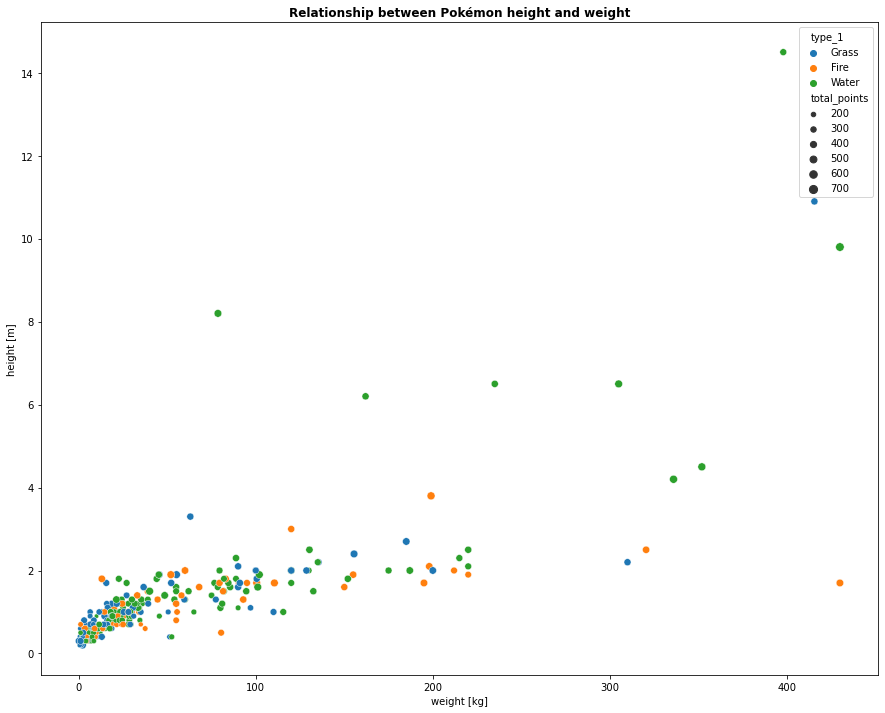

In [5]:
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt

pokemon_main = pokemon[pokemon['type_1'].isin(["Grass","Fire","Water"])]

sns.scatterplot(x='weight_kg', y='height_m', data=pokemon_main, hue='type_1', size='total_points')
plt.ylabel("height [m]")
plt.xlabel("weight [kg]")
plt.title("Relationship between Pokémon height and weight", fontweight="bold")

rcParams['figure.figsize'] = 15,12

In [7]:
#pokemon_main = pokemon[pokemon['type_1'] == "Grass" or pokemon['type_1'] == "Fire" or pokemon['type_1'] == "Water"]
pokemon_main = pokemon[pokemon['type_1'].isin(["Grass","Fire","Water"])]


fig = px.scatter(
    data_frame=pokemon_main,
    x='weight_kg',
    y='height_m',
    color='type_1',
    custom_data=['name', 'total_points'],
    size='total_points',
    size_max=13,
    log_x=False,
    labels={
        "height_m": 'height [m]',
        "weight_kg": 'weight [m]'
    },
    title = "Relationship between Pokémon height and weight"
)

hovertemplate = "<b>%{customdata[0]}</b><br>" +\
                "weight [kg]: %{x}<br>" +\
                "height [m]: %{y}<br>" +\
                "Total points: %{customdata[1]:,.0f}"

fig.update_traces(
    hovertemplate=hovertemplate
)


fig.show()

Możemy zauważyć wiele korzyści z zastosowania elementów interaktywnych, min:

- Możemy dowiedzieć się, którego Pokemona reprezentuje dana kropka na wykresie.
- Dużo łatwiej przekonać się o wartości 'total_points' dla danego Pokemona, ponieważ różnica w wielkości kropek na wykresach jest niewielka.
- Dostęp do szczegółowych danych masy i wzrostu już na samym wykresie, czytelnik nie musi zaglądać do zbiorów danych.

Oczywiście moglibyśmy nanieść te wszystkie informacje jako etykiety, nie używając elementów interaktywnych. Jednakże, jak się łatwo domyślić, całkowicie ograniczyłoby to czytelność wykresu.

## II wykres

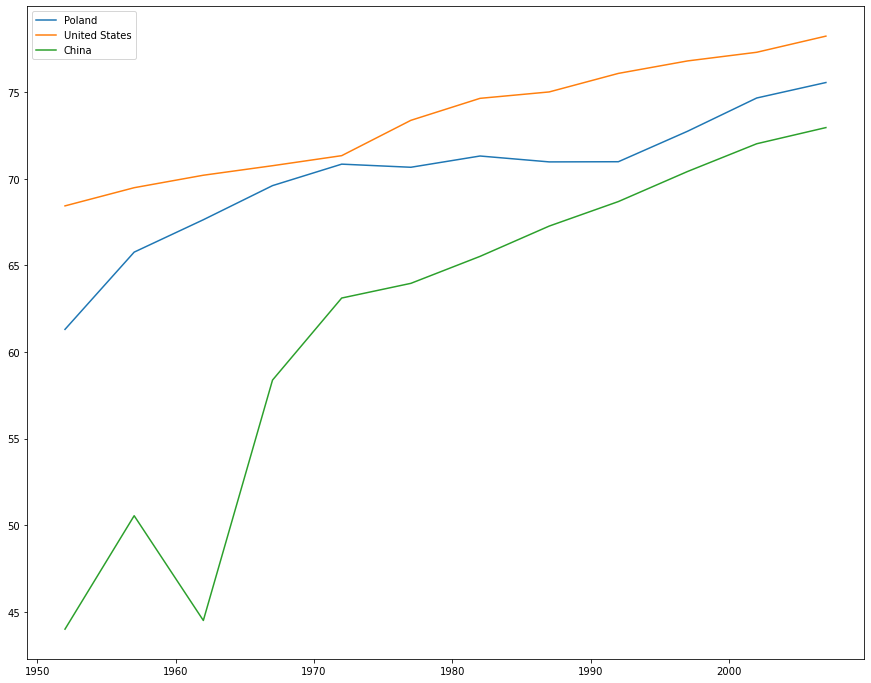

In [8]:
from gapminder import gapminder

# lifeExp w Polsce, USA i Chinak w kolejnych latach (wykres liniowy)


years = gapminder['year'].unique()


lifeExp_PL = list(gapminder[gapminder['country'] == 'Poland']['lifeExp'])
lifeExp_US = list(gapminder[gapminder['country'] == 'United States']['lifeExp'])
lifeExp_CH = list(gapminder[gapminder['country'] == 'China']['lifeExp'])


plt.plot(years, lifeExp_PL, label = 'Poland')
plt.plot(years, lifeExp_US, label = 'United States')
plt.plot(years, lifeExp_CH, label = 'China')

plt.legend()
plt.show()

In [9]:
#lifeExp_PL_US_CHINA = list(gapminder[gapminder['country'].isin(['Poland','United States','China'])]['lifeExp'])
lifeExp_PL_US_CHINA = gapminder[gapminder['country'].isin(['Poland','United States','China'])]

fig = px.line(lifeExp_PL_US_CHINA, x="year", y="lifeExp", color='country',
                 labels={
        "lifeExp": 'Life expectancy',
        "year": 'year'
    },
    title = "Life expectancy by year in Poland, USA and China")
fig.show()



Znowu możemy stwierdzić, że dzięki elementom interaktywnym na drugim wykresie możemy zdecydowanie więcej dowiedzieć się na temat danych, nie tracąc jednocześnie na czytelności wykresu.

W tym przypadku możemy odczytać dla każdego roku dokładną wartośc oczekiwanej długości życia w każdym z krajów.

## Wykres III

In [10]:
import nycflights13

airlines = nycflights13.airlines
airports = nycflights13.airports
flights = nycflights13.flights
planes = nycflights13.planes
weather = nycflights13.weather

In [54]:
planes_1998_1999 = planes[planes['year'].isin([1998,1999])]
srednie = planes_1998_1999.groupby(['year','manufacturer']).mean('seats').reset_index()
srednie = srednie[~srednie['manufacturer'].isin(['CANADAIR','MCDONNELL DOUGLAS'])]

In [77]:
srednie1998 = srednie[srednie['year']==1998.0]
srednie1999 = srednie[srednie['year']==1999.0]


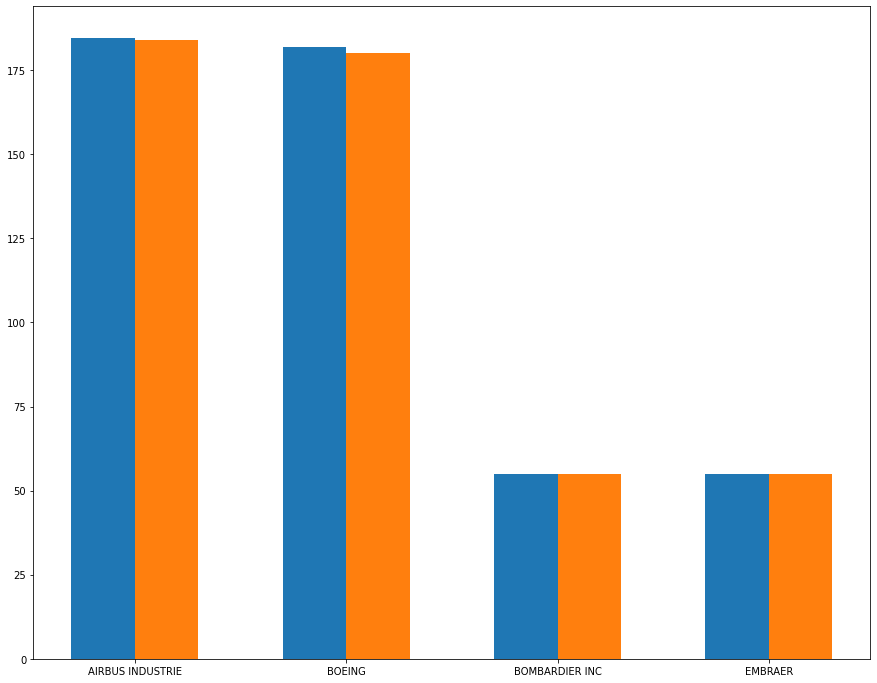

In [76]:
width =0.3
N=4
ind = np.arange(N)
fig, ax = plt.subplots()
ax.bar(ind, srednie1998['seats'], width, label='1998')
ax.bar(ind + width, srednie1999['seats'], width, label='1999')

ax.set_xticks(ind + width / 2)
ax.set_xticklabels(srednie1998['manufacturer']) 
plt.show()

In [56]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='1998', x=srednie1998['manufacturer'], y=srednie1998['seats']),
    go.Bar(name='1999', x=srednie1999['manufacturer'], y=srednie1999['seats'])
])

hovertemplate = "<b>%{x}</b><br>" +\
                "Producent: %{x}<br>" +\
                "srednia liczba siedzeń: %{y}<br>"

fig.update_traces(
    hovertemplate=hovertemplate
)
fig.update_layout(barmode='group')
fig.show()

W tym przypadku znowu dzięki elementom interaktywnym, możemy odczytać dokładne wartości średnich na drugim wykresie.